# **Week1 복습과제**

1. [Pytorch 기본]
1. [Linear Regression]
1. [Logistic Regression]

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#input data: 첨부된 .csv 파일 다운받아 사용해주세요

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="1"></a> <br>
## 1. Pytorch 기본

In [5]:
# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(first_array.dtype)) # type
print("Array Shape: {}".format(first_array.shape)) # shape
print(first_array)

Array Type: int64
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- 우리는 NumPy 배열을 살펴보았습니다.
- 이제 텐서(PyTorch 배열)를 구현하는 방법을 살펴보겠습니다.
- import torch를 사용하여 PyTorch 라이브러리를 가져옵니다.
- torch.Tensor() 메서드를 사용하여 텐서를 생성합니다.
- type: 배열의 타입을 나타냅니다. 이 예제에서는 텐서입니다.
- shape: 배열의 형태를 나타냅니다. (행 × 열)

In [6]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7ae1170f2440>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- 할당(Allocation)은 코딩에서 가장 많이 사용되는 기법 중 하나입니다.
- 따라서 PyTorch를 사용하여 이를 구현하는 방법을 배워봅시다.
- 학습을 위해 NumPy와 Tensor를 비교해 봅시다.
  - np.ones() = torch.ones()
  - np.random.rand() = torch.rand()

In [7]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3)))) # 2x3 in numpy

# pytorch ones
print(torch.ones(2,3)) # 2x3 in tensor

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [8]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3))) # 2x3 random numpy array

# pytorch random
print(torch.rand(2,3)) # 2x3 random tensor

Numpy [[0.72380736 0.1983581  0.07801289]
 [0.22268807 0.65416123 0.61673972]]

tensor([[0.7022, 0.0786, 0.5160],
        [0.1482, 0.5208, 0.8358]])


- 텐서와 NumPy 배열 간의 변환을 살펴봅시다.
  - torch.from_numpy(): NumPy → Tensor
  - .numpy(): Tensor → NumPy

In [12]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(array.shape, array))

# numpy -> tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# tensor -> numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

(2, 2) [[0.89514764 0.74878579]
 [0.88352924 0.9538844 ]]

tensor([[0.8951, 0.7488],
        [0.8835, 0.9539]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.89514764 0.74878579]
 [0.88352924 0.9538844 ]]



### PyTorch 기본 수학 연산
- 크기 변경(Resize): view()
- a와 b는 텐서입니다.
- 덧셈(Addition): torch.add(a, b) = a + b
- 뺄셈(Subtraction): a.sub(b) = a - b
- 원소별 곱(Element-wise Multiplication): torch.mul(a, b) = a * b
- 원소별 나눗셈(Element-wise Division): torch.div(a, b) = a / b
- 평균(Mean): a.mean()
- 표준 편차(Standard Deviation, std): a.std()


In [14]:
# 텐서 생성
tensor = torch.ones(3,3)
print("\n",tensor)

# 크기 변경
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# 덧셈
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# 뺄셈
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# 원소별 곱
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# 원소별 나눗셈
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# 평균
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# 표준편차
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables  
- 변수는 그래디언트(Gradients)를 누적합니다.
- 우리는 PyTorch를 신경망에 사용할 것입니다. 신경망에서는 역전파(Backpropagation) 과정에서 그래디언트를 계산하게 됩니다. 따라서 그래디언트를 다룰 필요가 있습니다.
- 변수(Variable)와 텐서(Tensor)의 차이점은 변수가 그래디언트를 누적한다는 것입니다.  
- 변수를 사용하여 수학 연산을 수행할 수도 있습니다.  
- 역전파를 수행하려면 변수가 필요합니다.

In [16]:
from torch.autograd import Variable

# variable 정의
var = torch.autograd.Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [19]:
# 기본적인 역전파(backward propagation) 수행
# 주어진 함수 y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = torch.autograd.Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# 방정식 요약: o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# 역전파 실행(그래디언트 계산)
o.backward()

# 변수는 그래디언트를 누적. 여기서는 x 하나만 존재.
# 따라선 변수 x는 그래디언트를 가져야 함
# x의 그래디언트 출
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
## 2. 선형 회귀

- y = Ax + B
    - A = 기울기
    - B = 절편 (y축과 교차하는 점)

- 자동차 가격이 낮으면 더 많이 팔리고, 자동차 가격이 높으면 덜 팔린다는 사실을 우리는 알고 있으며, 이에 대한 데이터셋을 가지고 있습니다.

- 목표는 자동차 가격이 100일 때 팔린 자동차의 수를 예측하는 것입니다.

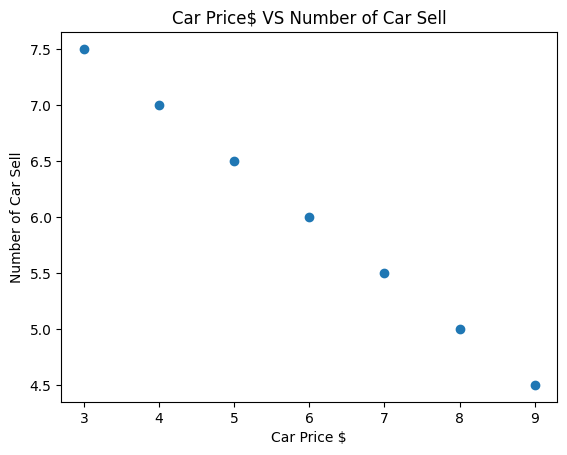

In [20]:
# 자동차 회사에서 과거 판매 데이터를 수집했다고 가정
# 자동차 가격 데이터 정의
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32) # numpy array로 변환
car_price_np = car_price_np.reshape(-1,1) #reshape
car_price_tensor = torch.autograd.Variable(torch.from_numpy(car_price_np)) # define variable

# 자동차 판매량 데이터 정의
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32) # numpy array 로 변환
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1) #reshape
number_of_car_sell_tensor = torch.autograd.Variable(torch.from_numpy(number_of_car_sell_np)) # define variable

# 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- 이제 이 그래프는 우리가 수집한 데이터입니다.
- 우리는 자동차 가격이 100달러일 때 판매된 자동차의 수가 무엇일지를 묻는 질문을 가지고 있습니다.
- 이 질문을 해결하기 위해 우리는 선형 회귀를 사용해야 합니다.
- 우리는 이 데이터에 맞는 선을 찾아야 합니다. 목표는 최소한의 오류로 선을 맞추는 것입니다.

---

- **선형 회귀의 단계**
    1. LinearRegression 클래스를 생성합니다.
    2. 이 LinearRegression 클래스로 모델을 정의합니다.
    3. MSE: 평균 제곱 오차(Mean Squared Error)
    4. 최적화 (SGD: 확률적 경사 하강법)
    5. 역전파 (Backpropagation)
    6. 예측 (Prediction)

epoch 0, loss 10.270856857299805
epoch 50, loss 5.012592315673828
epoch 100, loss 3.3872182369232178
epoch 150, loss 2.2888846397399902
epoch 200, loss 1.546694040298462
epoch 250, loss 1.0451658964157104
epoch 300, loss 0.7062628865242004
epoch 350, loss 0.47725096344947815
epoch 400, loss 0.32249799370765686
epoch 450, loss 0.21792539954185486
epoch 500, loss 0.14726123213768005
epoch 550, loss 0.09951068460941315
epoch 600, loss 0.06724338978528976
epoch 650, loss 0.04543900862336159
epoch 700, loss 0.03070472739636898
epoch 750, loss 0.020748497918248177
epoch 800, loss 0.01402057521045208
epoch 850, loss 0.009474417194724083
epoch 900, loss 0.006402160506695509
epoch 950, loss 0.004326170310378075
epoch 1000, loss 0.0029233680106699467


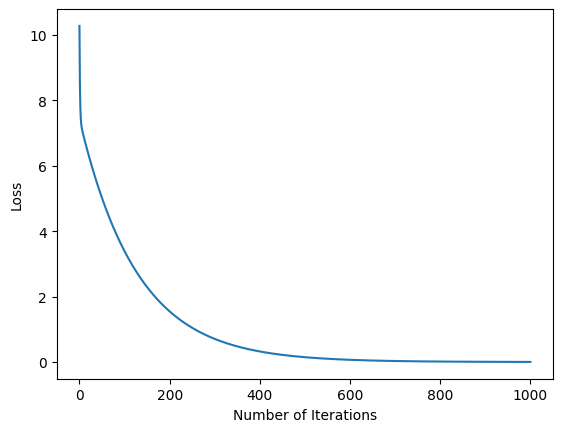

In [21]:
# PyTorch를 이용한 선형 회귀 모델 구현

import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# 선형 회귀 클래스 정의
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim,output_dim) # apply linear function

    def forward(self, x):
        return self.linear(x)

# 모델 정의
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

# 손실 함수 (MSE)
mse = nn.MSELoss()

# 옵티마이저 (SGD 사용)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 모델 학습
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    optimizer.zero_grad()  # 기울기 초기화
    results = model(car_price_tensor)  # 예측값 계산
    loss = mse(results, number_of_car_sell_tensor) # 손실 계산
    # 역전파 실행
    loss.backward()
    # 가중치 업데이트
    optimizer.step()
    # loss 저장
    loss_list.append(loss.item())
    # loss 출력
    if iteration % 50 == 0:
        print(f'epoch {iteration}, loss {loss.data}')

# 손실 그래프 시각화
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- 반복 횟수는 1000입니다.
- 손실 값은 거의 0에 가까우며, 이는 그래프나 1000번째 epoch에서의 손실 값에서 확인할 수 있습니다.
- 이제 우리는 훈련된 모델을 가지고 있습니다.
- 훈련된 모델을 사용할 때, 자동차 가격을 예측해 봅시다.

NotImplementedError: multi-dimensional sub-views are not implemented

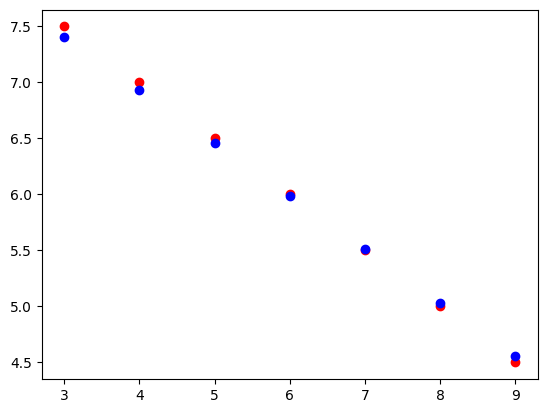

In [22]:
# car price 예측
predicted =results.data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_tensor,label = "original data",color ="red") # original data
plt.scatter(car_prices_array, predicted,label = "predicted data",color ="blue") # predicted data

# car price가 10$ 일 때, car sell은?
predicted_10 = model(torch.tensor([[10.0]])).data.numpy()
plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
## 3. 로지스틱 회귀

- 선형 회귀는 분류 문제에서 적합하지 않습니다.
- 우리는 분류 문제를 해결하기 위해 로지스틱 회귀를 사용합니다.
- 선형 회귀 + 로지스틱 함수(소프트맥스) = 로지스틱 회귀

  
- **로지스틱 회귀의 단계**
    1. 라이브러리 가져오기
    2. 데이터셋 준비
        - 우리는 MNIST 데이터셋을 사용합니다.
        - 28x28 이미지와 0부터 9까지의 10개의 레이블이 있습니다.
        - 데이터는 정규화되지 않았기 때문에 각 이미지를 255로 나눠 기본적인 정규화를 진행합니다.
        - 데이터를 분할하기 위해 sklearn 라이브러리의 `train_test_split` 메서드를 사용합니다.
        - 학습 데이터 크기는 80%, 테스트 데이터 크기는 20%입니다.
        - 특성(feature)과 목표(target) 텐서를 생성합니다. 이후 텐서에서 변수(variable)를 생성합니다. 이 변수는 기울기 누적을 위해 정의됩니다.
        - `batch_size` = 배치 크기는 예를 들어, 1000개의 샘플이 있을 때, 이 샘플을 한 번에 모두 훈련시킬 수도 있고, 100개의 샘플씩 10개의 그룹으로 나누어 순차적으로 훈련시킬 수도 있습니다. 예를 들어, `batch_size = 100`이라면, 모든 데이터를 한 번 훈련시키는 데 336개의 그룹을 사용합니다. 각 그룹은 100개의 샘플을 가지고 있으며, 총 33600개의 샘플을 훈련합니다.
        - `epoch`: 1 epoch는 모든 샘플을 한 번 훈련시키는 것입니다.
        - 예를 들어, 33600개의 샘플이 있고, 배치 크기(batch_size)는 100, epoch는 29로 설정한 경우, 29번 훈련을 진행합니다. 그럼 총 몇 번의 반복(iteration)이 필요한지 계산해 봅시다:
            - 훈련 데이터 1번 = 33600개의 샘플 훈련
            - 하지만 데이터를 336개의 그룹으로 나누었으므로, 1 epoch는 336번의 반복이 필요합니다.
            - 29 epoch 동안 훈련하므로, 총 반복 횟수는 9744번입니다(대략 10000번).
        - `TensorDataset()`: 텐서를 래핑하는 데이터셋. 각 샘플은 텐서를 첫 번째 차원으로 인덱싱하여 검색됩니다.
        - `DataLoader()`: 데이터셋과 샘플을 결합하고, 데이터셋에 대한 다중 프로세스 반복기를 제공합니다.
        - 데이터셋의 이미지를 하나 시각화해봅니다.
    3. 로지스틱 회귀 모델 생성
        - 선형 회귀와 비슷합니다.
        - 하지만 예측을 위해 모델에 로지스틱 함수(소프트맥스)가 포함되어야 합니다.
        - PyTorch에서는 로지스틱 함수가 손실 함수에 포함되어 있으며, 이후 단계에서 이를 사용합니다.
    4. 모델 인스턴스화
        - `input_dim = 28*28` # 이미지 크기 px*px
        - `output_dim = 10`  # 레이블 0,1,2,3,4,5,6,7,8,9
        - 모델을 생성합니다.
    5. 손실 함수 인스턴스화
        - 교차 엔트로피 손실
        - 손실을 계산하는 함수로, 소프트맥스(로지스틱 함수)도 포함되어 있습니다.
    6. 옵티마이저 인스턴스화
        - SGD 옵티마이저
    7. 모델 훈련
    8. 예측
- 결과적으로, 그래프에서 볼 수 있듯이 손실 값은 감소하고, 정확도는 약 85%까지 증가하며 모델이 훈련되고 있음을 확인할 수 있습니다.

In [26]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

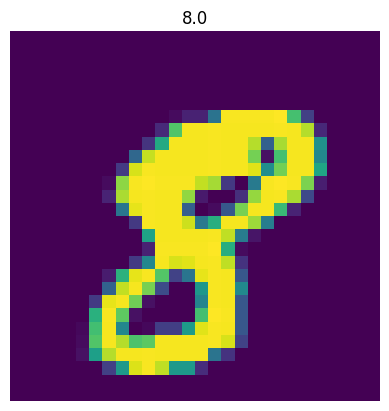

In [27]:
# 데이터셋 준비
# 데이터 로드
train = pd.read_csv(r"/content/drive/MyDrive/week1복습_DL/train.csv", dtype=np.float32)

# 데이터를 특징(픽셀 값)과 라벨(0~9 숫자)로 분리
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values / 255  # 정규화

# 학습 데이터 80%, 테스트 데이터 20%로 분할
features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42
)

# 학습 데이터셋을 텐서로 변환 (경사 계산을 위해 Variable 생성 필요)
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)  # 데이터 타입은 long

# 테스트 데이터셋을 텐서로 변환
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)
## 힌트: PyTorch Tesnor를 생성해주세요!
## 어떤 데이터를 PyTorch Tensor를 변환하고, 어떤 데이터타입을 선택할지 직접 작성해주세요

# 배치 크기, 반복 횟수 및 에포크 설정
batch_size = 100
n_iters = 10000
num_epochs = int(n_iters / (len(features_train) / batch_size))

# PyTorch 학습 및 테스트 데이터셋 생성
train = TensorDataset(featuresTrain, targetsTrain)
test  = TensorDataset(featuresTest, targetsTest)
## 힌트: 입력 데이터와 레이블을 텐서로 변환하여, 이들을 TensorDataset으로 묶어 train과 test 데이터셋을 구성합니다
## TensorDataset에는 두 개의 텐서를 전달해야 하며, 각각 특징과 레이블에 해당합니다.
## 첫 번째 텐서는 입력 데이터, 두 번째 텐서는 정답 데이터이며 입력 데이터와 정답 데이터의 샘플 수가 동일해야 합니다.

# 데이터 로더 생성
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# 데이터셋 중 하나의 이미지를 시각화
plt.imshow(features_numpy[10].reshape(28, 28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [29]:
# 로지스틱 회귀 모델 생성
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # 선형 계층 설정
        self.linear = nn.Linear(input_dim, output_dim)
        # 로지스틱 함수는 손실 함수에 포함되어 있으므로 별도로 정의할 필요 없음

    def forward(self, x):
        out = self.linear(x)
        return out

# 모델 인스턴스화
input_dim = 28 * 28  # 이미지 크기 (픽셀 * 픽셀)
output_dim = 10  # 출력 라벨 (0~9)

# 로지스틱 회귀 모델 생성
model = LogisticRegressionModel(input_dim, output_dim)

# 크로스 엔트로피 손실 함수
error = nn.CrossEntropyLoss()

# SGD 옵티마이저 설정
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
## 힌트: 모델 파라미터를 model.parameters()로 넘겨줍니다
## 학습률(learning rate)은 훈련 속도를 결정합니다
## 최적화 함수가 SGD이므로, torch.optim.SGD를 사용합니다

In [30]:
# 모델 학습
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # 변수 정의
        train = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # 경사 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(train)

        # 소프트맥스 및 크로스 엔트로피 손실 계산
        loss = error(outputs, labels)

        # 역전파를 통한 경사 계산
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

        count += 1

        # 정확도 측정
        if count % 50 == 0:
            correct = 0
            total = 0
            # 테스트 데이터셋 예측 수행
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28))

                # 순전파
                outputs = model(test)

                # 최댓값을 기준으로 예측값 결정
                predicted = torch.max(outputs.data, 1)[1]

                # 전체 라벨 개수
                total += len(labels)

                # 맞춘 개수 계산
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # 손실 및 반복 횟수 저장
            loss_list.append(loss.data)
            iteration_list.append(count)

        # 500번마다 손실 출력
        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8323779106140137  Accuracy: 67.69047546386719%
Iteration: 1000  Loss: 1.6083178520202637  Accuracy: 76.69047546386719%
Iteration: 1500  Loss: 1.3072563409805298  Accuracy: 79.01190185546875%
Iteration: 2000  Loss: 1.2013204097747803  Accuracy: 80.61904907226562%
Iteration: 2500  Loss: 1.0364220142364502  Accuracy: 81.58333587646484%
Iteration: 3000  Loss: 0.9203110337257385  Accuracy: 82.16666412353516%
Iteration: 3500  Loss: 0.8912864923477173  Accuracy: 82.76190185546875%
Iteration: 4000  Loss: 0.7599503993988037  Accuracy: 83.28571319580078%
Iteration: 4500  Loss: 0.9775128960609436  Accuracy: 83.76190185546875%
Iteration: 5000  Loss: 0.7985702753067017  Accuracy: 84.14286041259766%
Iteration: 5500  Loss: 0.7444381713867188  Accuracy: 84.47618865966797%
Iteration: 6000  Loss: 0.8573118448257446  Accuracy: 84.66666412353516%
Iteration: 6500  Loss: 0.6542032361030579  Accuracy: 84.96428680419922%
Iteration: 7000  Loss: 0.7160951495170593  Accuracy: 85.166664123

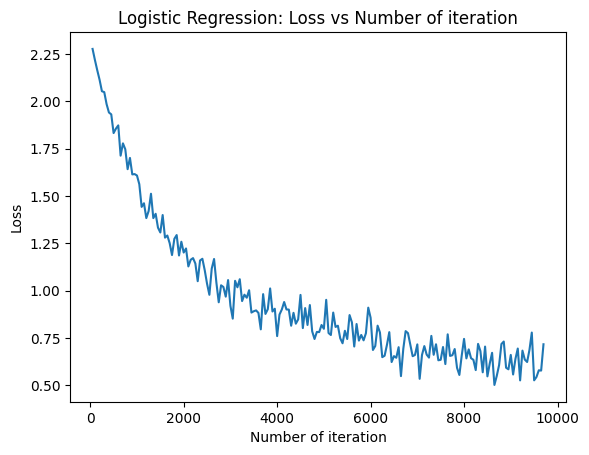

In [31]:
# 시각화
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()